# Global Power Plant Database

# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw1

# Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import power_transform,StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Loading Data


In [2]:
df=pd.read_csv("global power plant.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# EDA

In [3]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,907,907,907,907,907.000000,861.000000,861.000000,907,198,1,...,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,449,0.0
unique,1,1,907,907,NaN,NaN,NaN,8,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,ACME Solar Tower,WRI1020239,NaN,NaN,NaN,Coal,Oil,Oil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,907,907,1,1,NaN,NaN,NaN,258,195,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449,NaN
mean,NaN,NaN,NaN,NaN,326.223755,21.197918,77.464907,NaN,NaN,NaN,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,590.085456,6.239612,4.939316,NaN,NaN,NaN,...,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.725000,16.773900,74.256200,NaN,NaN,NaN,...,2019.0,NaN,223.557672,176.381062,188.285252,177.874930,193.378250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,59.200000,21.780000,76.719500,NaN,NaN,NaN,...,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,385.250000,25.512400,79.440800,NaN,NaN,NaN,...,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN,NaN


In [4]:
df.info()    ###To get column information of null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.shape  ## #No. of columns and rows

(907, 27)

# Finding null values

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Data Cleaning

# Removing dummy columns

In [7]:
df1=df.drop(['url','country','country_long','name','other_fuel2','other_fuel3','generation_gwh_2013','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_data_source','year_of_capacity_data'],axis=1)
df1.shape

(907, 15)

In [8]:
df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [9]:
col=df.columns   #Data columns
col

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Finding unique value details

In [11]:
c=[]
for i in col:
    print(df[i].nunique())
    if (df[i].nunique())<=1:
        c.append(i)
         
print(c)       

1
1
907
907
361
836
827
8
3
1
0
73
280
191
304
3
0
1
0
371
396
403
408
410
0
1
0
['country', 'country_long', 'other_fuel2', 'other_fuel3', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh']


In [12]:
df1.isnull().sum()


gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [13]:
df1.describe(include='all')

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907,907.000000,861.000000,861.000000,907,198,527.000000,342,907,888,398.000000,422.000000,434.000000,440.000000,448.000000
unique,907,NaN,NaN,NaN,8,3,NaN,280,191,3,NaN,NaN,NaN,NaN,NaN
top,WRI1020239,NaN,NaN,NaN,Coal,Oil,NaN,Acc Acc ltd,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,258,195,NaN,4,519,765,NaN,NaN,NaN,NaN,NaN
mean,NaN,326.223755,21.197918,77.464907,NaN,NaN,1997.091082,NaN,NaN,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,NaN,590.085456,6.239612,4.939316,NaN,NaN,17.082868,NaN,NaN,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,NaN,0.000000,8.168900,68.644700,NaN,NaN,1927.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,16.725000,16.773900,74.256200,NaN,NaN,1988.000000,NaN,NaN,NaN,223.557672,176.381062,188.285252,177.874930,193.378250
50%,NaN,59.200000,21.780000,76.719500,NaN,NaN,2001.000000,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375
75%,NaN,385.250000,25.512400,79.440800,NaN,NaN,2012.000000,NaN,NaN,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900


# Missing values Imputation using mean,mode,median

In [14]:
df1['gppd_idnr']=df1['gppd_idnr'].fillna(df1['gppd_idnr'].mode()[0])
df1['primary_fuel']=df1['primary_fuel'].fillna(df1['primary_fuel'].mode()[0])
df1['other_fuel1']=df1['other_fuel1'].fillna(df1['other_fuel1'].mode()[0])
df1['owner']=df1['owner'].fillna(df1['owner'].mode()[0])
df1['source']=df1['source'].fillna(df1['source'].mode()[0])
df1['geolocation_source']=df1['geolocation_source'].fillna(df1['geolocation_source'].mode()[0])
df1['capacity_mw']=df1['capacity_mw'].fillna(df1['capacity_mw'].mean())
df1['latitude']=df1['latitude'].fillna(df1['latitude'].mean())
df1['longitude']=df1['longitude'].fillna(df1['longitude'].mean())
df1['commissioning_year']=df1['commissioning_year'].fillna(df1['commissioning_year'].median())
df1['generation_gwh_2014']=df1['generation_gwh_2014'].fillna(df1['generation_gwh_2014'].mean())
df1['generation_gwh_2015']=df1['generation_gwh_2015'].fillna(df1['generation_gwh_2015'].mean())
df1['generation_gwh_2016']=df1['generation_gwh_2016'].fillna(df1['generation_gwh_2016'].mean())
df1['generation_gwh_2017']=df1['generation_gwh_2017'].fillna(df1['generation_gwh_2017'].mean())
df1['generation_gwh_2018']=df1['generation_gwh_2018'].fillna(df1['generation_gwh_2018'].mean())

In [15]:
df1.isnull().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

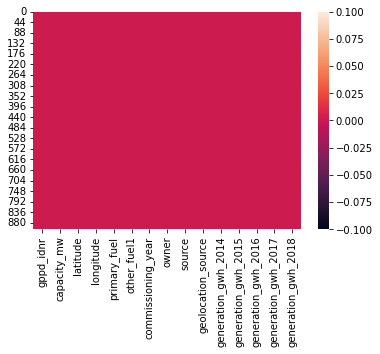

In [16]:
sns.heatmap(df1.isnull())

In [17]:
df1.describe(include='all')

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907,907.000000,907.000000,907.000000,907,907,907.000000,907,907,907,907.000000,907.000000,907.000000,907.000000,907.000000
unique,907,NaN,NaN,NaN,8,3,NaN,280,191,3,NaN,NaN,NaN,NaN,NaN
top,WRI1020239,NaN,NaN,NaN,Coal,Oil,NaN,Acc Acc ltd,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,258,904,NaN,569,519,784,NaN,NaN,NaN,NaN,NaN
mean,NaN,326.223755,21.197918,77.464907,NaN,NaN,1998.728776,NaN,NaN,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,NaN,590.085456,6.079148,4.812291,NaN,NaN,13.158621,NaN,NaN,NaN,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,NaN,0.000000,8.168900,68.644700,NaN,NaN,1927.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,16.725000,17.072000,74.388900,NaN,NaN,1998.000000,NaN,NaN,NaN,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,NaN,59.200000,21.281800,76.979200,NaN,NaN,2001.000000,NaN,NaN,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,NaN,385.250000,25.176450,79.206100,NaN,NaN,2003.000000,NaN,NaN,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [18]:
df1.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

# Encoding Data uding LabelEncoder

In [20]:
le=LabelEncoder()
varib=['gppd_idnr','primary_fuel','other_fuel1','owner','geolocation_source','source']
for i in varib:
    df1[i]=le.fit_transform(df1[i])
df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,2,2001.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,2,2001.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,1,2,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,6,2,2001.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,7,2,2001.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,24.3500,73.7477,1,2,2001.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [21]:
df1.dtypes

gppd_idnr                int32
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
commissioning_year     float64
owner                    int32
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

# Correlationship between features and labels

In [22]:
df1.corr()


,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.002333,0.167532,6.305894e-01,4.163838e-01,-4.641741e-01,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02
capacity_mw,-0.335742,1.000000,0.050984,0.195882,-0.380395,0.003105,0.211042,-3.110481e-01,-2.421218e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,-0.105728,0.050984,1.000000,0.036362,-0.010204,0.036695,0.087937,-7.118234e-02,5.592656e-02,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,-0.377812,0.195882,0.036362,1.000000,-0.347948,0.030311,0.029893,-3.012853e-01,-2.393334e-01,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,0.609180,-0.380395,-0.010204,-0.347948,1.000000,0.004912,-0.054885,2.842958e-01,5.361263e-02,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
other_fuel1,0.002333,0.003105,0.036695,0.030311,0.004912,1.000000,0.043267,3.368729e-02,2.658990e-02,-2.140831e-02,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02
commissioning_year,0.167532,0.211042,0.087937,0.029893,-0.054885,0.043267,1.000000,1.183841e-01,1.007472e-01,-7.390700e-02,1.316121e-01,1.457447e-01,1.687991e-01,1.690159e-01,1.724914e-01
owner,0.630589,-0.311048,-0.071182,-0.301285,0.284296,0.033687,0.118384,1.000000e+00,7.695825e-01,-3.848377e-01,9.312029e-17,3.774734e-17,7.332926e-17,1.116724e-17,-1.212856e-17
source,0.416384,-0.242122,0.055927,-0.239333,0.053613,0.026590,0.100747,7.695825e-01,1.000000e+00,-5.057202e-01,3.821500e-17,-2.155929e-17,-1.003710e-16,-1.367930e-16,-5.534649e-17
geolocation_source,-0.464174,0.204865,-0.184275,0.252343,-0.483217,-0.021408,-0.073907,-3.848377e-01,-5.057202e-01,1.000000e+00,-5.766003e-17,-6.704793e-18,7.773076e-17,1.032914e-16,1.596926e-17


# Correlationship matrix

<AxesSubplot:>

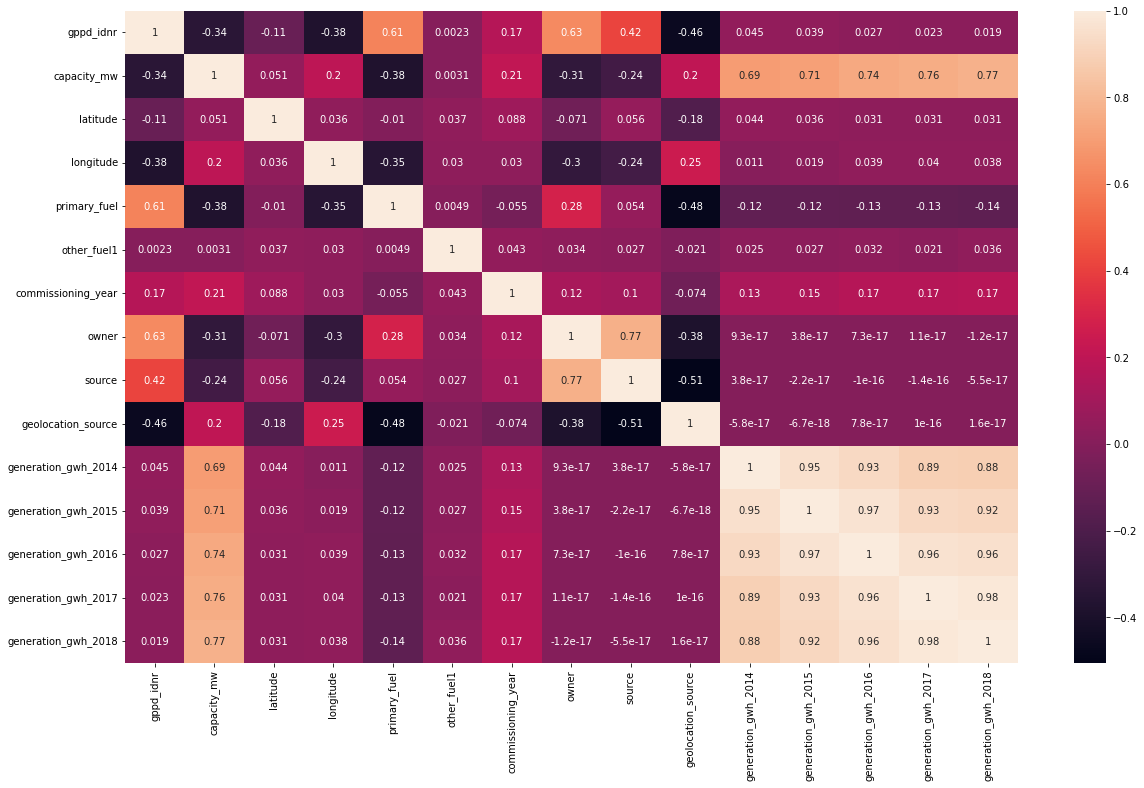

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(df1.corr(),annot=True)

# Finding multicollinearity

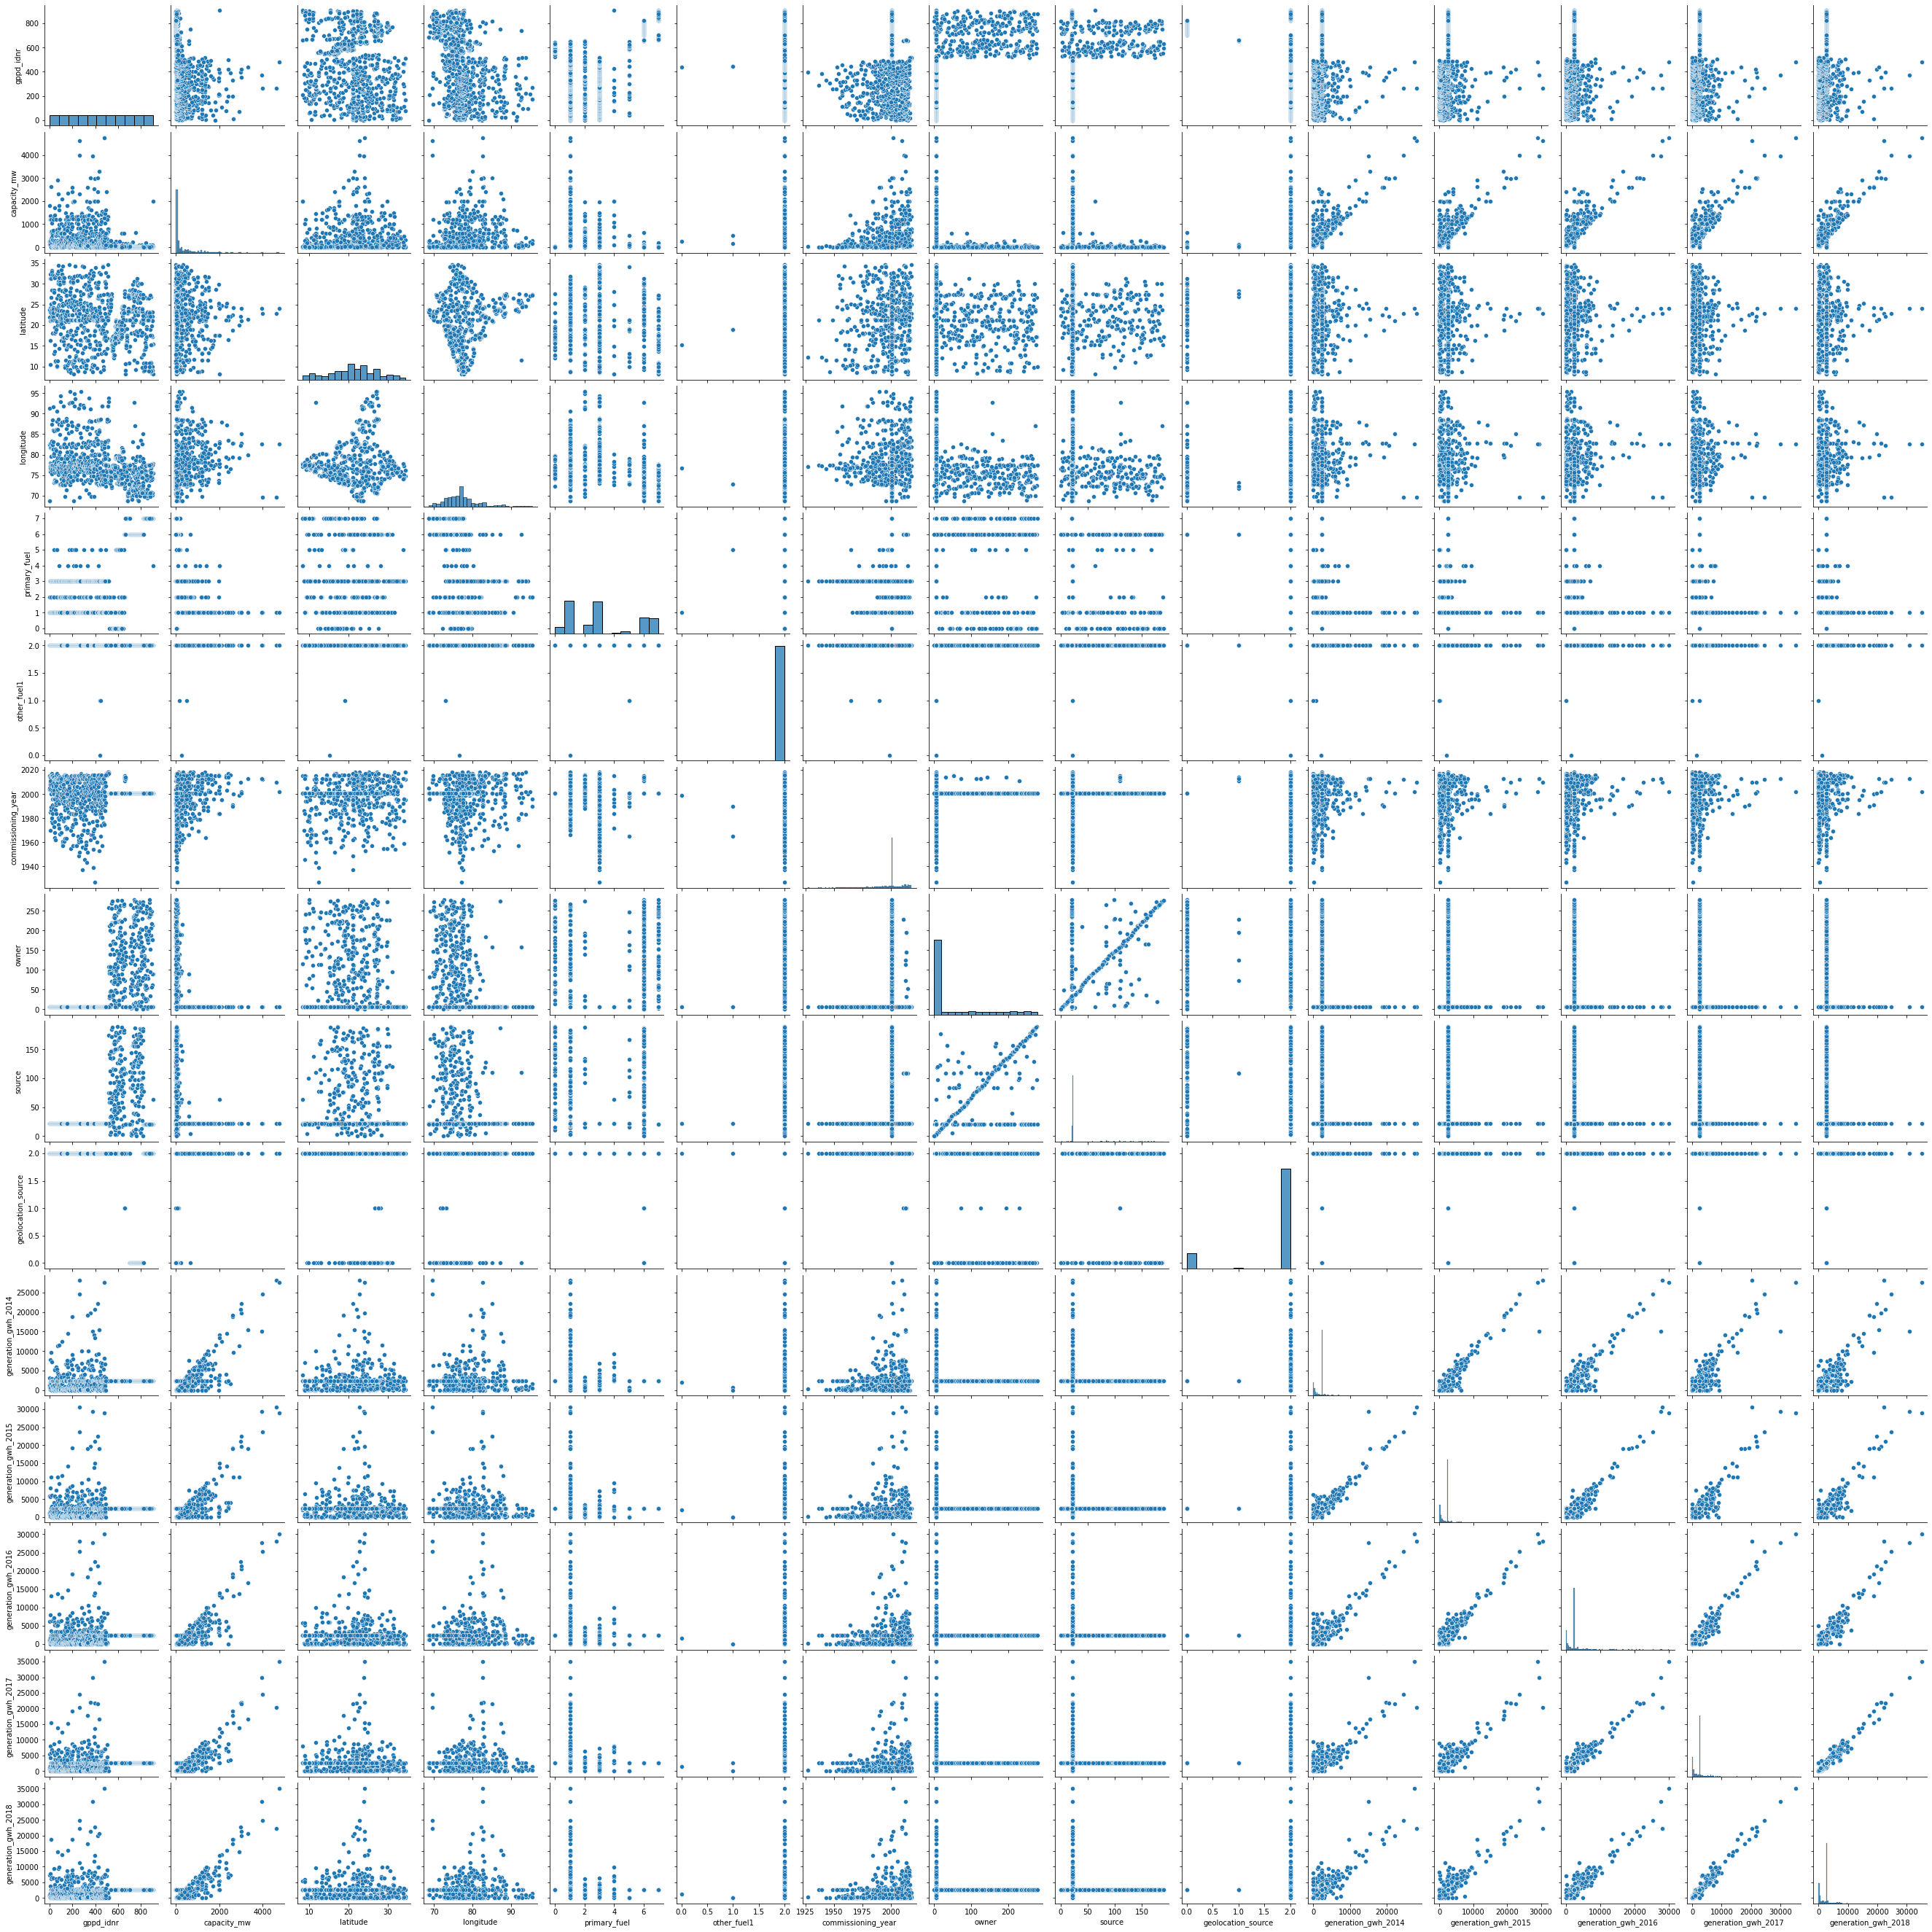

In [24]:
sns.pairplot(df1)

# Distribution plot

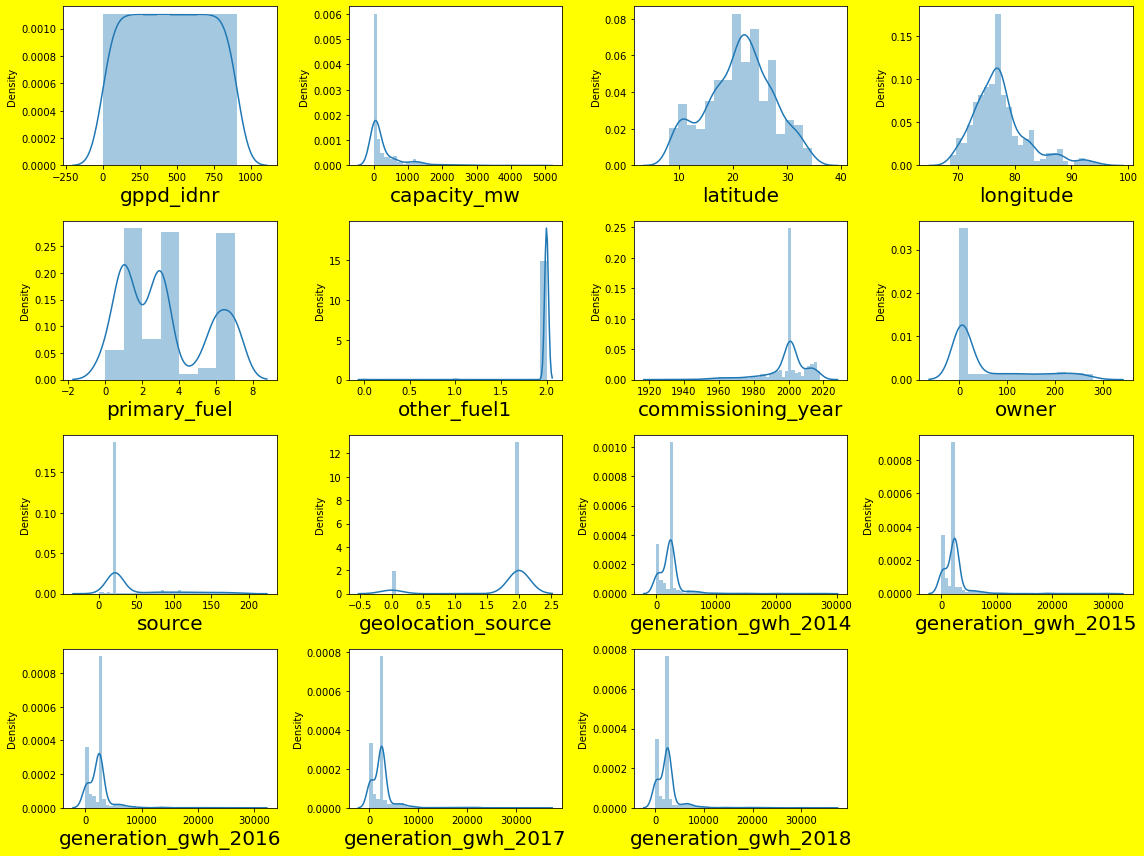

In [25]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df1:
    if plotnumber<=18:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
    plt.tight_layout()

# Finding skewness in the data

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

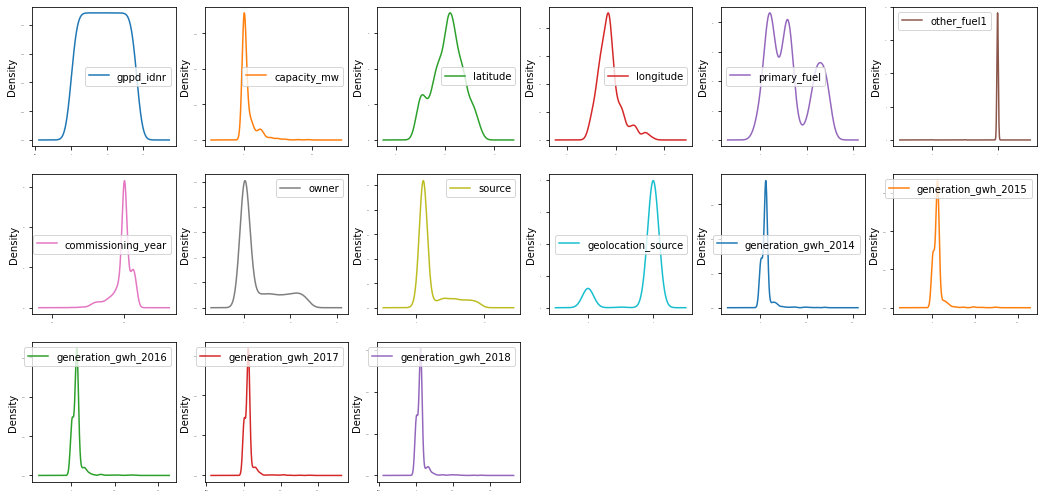

In [26]:
df1.plot(kind='density',subplots=True,layout=(6,6),sharex=False,figsize=(18,18),fontsize=1,legend=True)

# Finding Outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'gppd_idnr'),
  Text(2, 0, 'capacity_mw'),
  Text(3, 0, 'latitude'),
  Text(4, 0, 'longitude'),
  Text(5, 0, 'primary_fuel'),
  Text(6, 0, 'other_fuel1'),
  Text(7, 0, 'commissioning_year'),
  Text(8, 0, 'owner'),
  Text(9, 0, 'source'),
  Text(10, 0, 'geolocation_source'),
  Text(11, 0, 'generation_gwh_2014'),
  Text(12, 0, 'generation_gwh_2015'),
  Text(13, 0, 'generation_gwh_2016'),
  Text(14, 0, 'generation_gwh_2017'),
  Text(15, 0, 'generation_gwh_2018')])

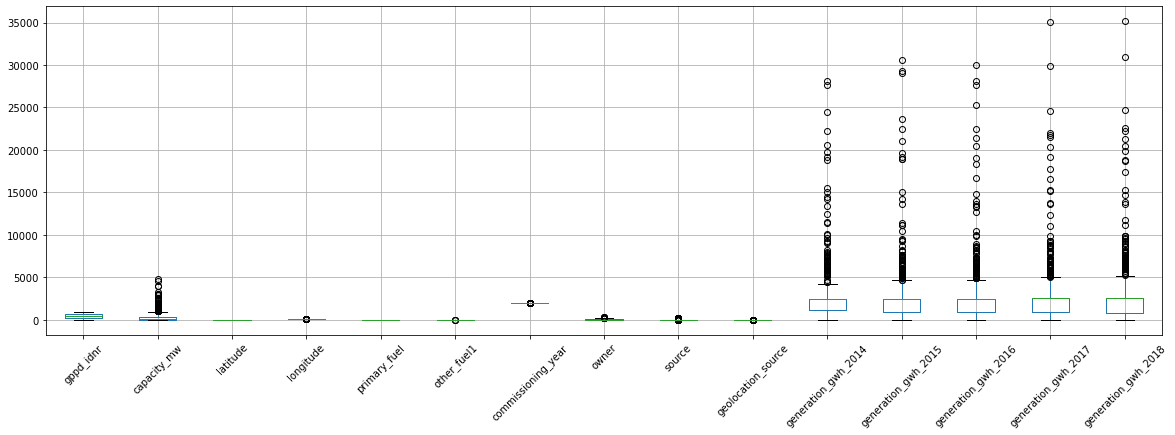

In [27]:
df1.boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.5)
plt.xticks(rotation=45)

In [28]:
# (np.abs(zscore(df1)<3)).all()
(np.abs(zscore(df1)<3)).all()


gppd_idnr               True
capacity_mw            False
latitude                True
longitude              False
primary_fuel            True
other_fuel1             True
commissioning_year      True
owner                   True
source                 False
geolocation_source      True
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
generation_gwh_2018    False
dtype: bool

# Removing Outliers

In [29]:
scores = np.abs(zscore(df1))
t = 3
np.where(scores<3)

(array([  0,   0,   0, ..., 906, 906, 906], dtype=int64),
 array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))

In [30]:
new_df = df1[(scores<3).all(axis=1)]
print(df1.shape)
print(new_df.shape) 

(907, 15)
(830, 15)


In [31]:
new_df.skew()

gppd_idnr             -0.054949
capacity_mw            1.949298
latitude              -0.120980
longitude              0.905603
primary_fuel           0.414200
other_fuel1            0.000000
commissioning_year    -1.265882
owner                  1.314829
source                 1.776895
geolocation_source    -2.096131
generation_gwh_2014    1.524259
generation_gwh_2015    1.391728
generation_gwh_2016    1.413406
generation_gwh_2017    1.277895
generation_gwh_2018    1.316478
dtype: float64

In [32]:
x=new_df.drop('primary_fuel',axis=1)
y=new_df['primary_fuel']
x

,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,2,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,2,2001.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,2,2001.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,2,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,2,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,2,2001.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,2,2001.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,24.3500,73.7477,2,2001.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [33]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 830, dtype: int32

In [34]:
x.skew()

gppd_idnr             -0.054949
capacity_mw            1.949298
latitude              -0.120980
longitude              0.905603
other_fuel1            0.000000
commissioning_year    -1.265882
owner                  1.314829
source                 1.776895
geolocation_source    -2.096131
generation_gwh_2014    1.524259
generation_gwh_2015    1.391728
generation_gwh_2016    1.413406
generation_gwh_2017    1.277895
generation_gwh_2018    1.316478
dtype: float64

# Removing skewness

In [35]:
x_new=np.sqrt(x)
x_new.skew()

gppd_idnr             -0.612117
capacity_mw            1.144772
latitude              -0.460485
longitude              0.812642
other_fuel1            0.000000
commissioning_year    -1.276769
owner                  0.975948
source                 1.455863
geolocation_source    -2.113468
generation_gwh_2014   -0.466856
generation_gwh_2015   -0.432070
generation_gwh_2016   -0.387513
generation_gwh_2017   -0.419470
generation_gwh_2018   -0.395735
dtype: float64

# Pre-Processing model

In [36]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x_new)
x_new

array([[ 0.75258619, -1.64158391,  1.16319455, ...,  0.35926107,
         0.36247391,  0.37502687],
       [ 0.29256119,  0.20191861,  0.59278884, ...,  0.35926107,
         0.36247391,  0.37502687],
       [ 1.36614999, -0.29347871,  0.12051583, ...,  0.35926107,
         0.36247391,  0.37502687],
       ...,
       [ 1.4807775 , -0.5221416 , -0.95262277, ...,  0.35926107,
         0.36247391,  0.37502687],
       [ 0.36098919,  0.09166828,  0.52378847, ...,  0.35926107,
         0.36247391,  0.37502687],
       [ 1.43567925, -0.74921429, -1.79585395, ...,  0.35926107,
         0.36247391,  0.37502687]])

# Scatter relationship between features and labels after removing skewed data

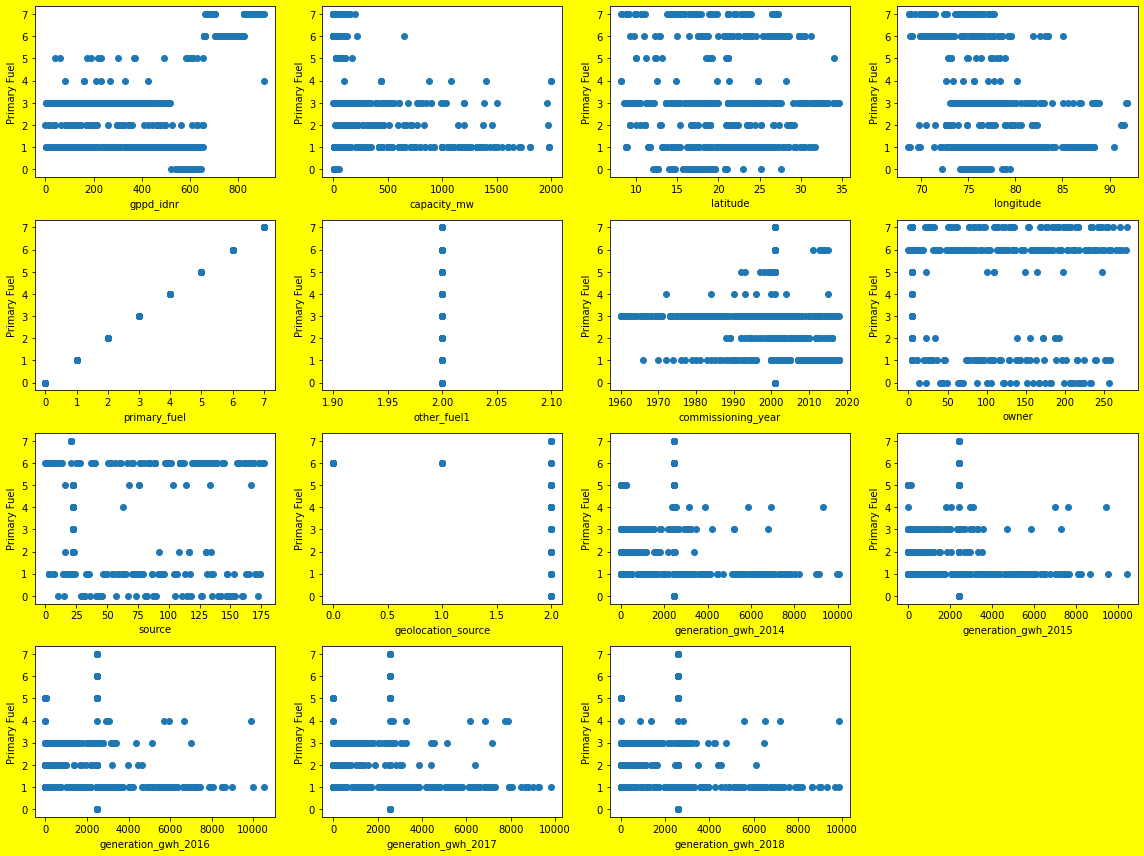

In [37]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in new_df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(new_df[column],new_df['primary_fuel'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Primary Fuel',fontsize=10)
        
        plotnumber+=1
    plt.tight_layout()

# Scaling Data

In [39]:
std=StandardScaler()
x_scaled=pd.DataFrame(std.fit_transform(x_new),columns=x.columns)
x_scaled

,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.752586,-1.641584,1.163195,-0.931867,0.0,1.144953,1.496105,1.619271,-1.866277,0.327906,0.356338,0.359261,0.362474,0.375027
1,0.292561,0.201919,0.592789,-0.516406,0.0,0.002606,1.527789,2.145720,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
2,1.366150,-0.293479,0.120516,-2.349149,0.0,0.002606,-1.643253,-0.476115,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
3,-2.146002,0.376082,0.444561,2.444089,0.0,0.318961,-0.725753,-0.412583,0.404723,-1.030644,-0.721991,-0.675601,-0.888501,-0.913997
4,-2.108444,1.755823,0.129788,1.244353,0.0,1.678078,-0.725753,-0.412583,0.404723,0.663126,1.887613,1.925062,1.553702,2.109900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.195626,1.695048,-0.789537,0.209194,0.0,1.818930,-0.725753,-0.412583,0.404723,0.327906,-2.091654,-1.405095,-0.706533,-0.856285
826,1.271686,-1.564150,-1.331133,0.398500,0.0,0.002606,1.275997,1.206998,-2.487630,0.327906,0.356338,0.359261,0.362474,0.375027
827,1.480778,-0.522142,-0.952623,-0.244151,0.0,0.002606,-0.725753,-0.476115,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
828,0.360989,0.091668,0.523788,-0.773305,0.0,0.002606,1.190687,0.879446,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027


# Building Model

# Finding Best Random State

In [40]:
bestrandom=0
max_score=0
#models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('Accuracy score is ',acc,'Random state',i)
    
    if acc>max_score:
        max_score=acc
        bestrandom=i
            
        print('Accuracy',max_score,'Random State',i)

Accuracy score is  0.8152610441767069 Random state 0
Accuracy 0.8152610441767069 Random State 0
Accuracy score is  0.7590361445783133 Random state 1
Accuracy score is  0.7871485943775101 Random state 2
Accuracy score is  0.7710843373493976 Random state 3
Accuracy score is  0.7630522088353414 Random state 4
Accuracy score is  0.7469879518072289 Random state 5
Accuracy score is  0.7670682730923695 Random state 6
Accuracy score is  0.7710843373493976 Random state 7
Accuracy score is  0.7269076305220884 Random state 8
Accuracy score is  0.7831325301204819 Random state 9
Accuracy score is  0.8232931726907631 Random state 10
Accuracy 0.8232931726907631 Random State 10
Accuracy score is  0.7710843373493976 Random state 11
Accuracy score is  0.7550200803212851 Random state 12
Accuracy score is  0.8032128514056225 Random state 13
Accuracy score is  0.7911646586345381 Random state 14
Accuracy score is  0.7911646586345381 Random state 15
Accuracy score is  0.7710843373493976 Random state 16
Accur

In [41]:
print('Best Accuracy is',max_score,'Best Random State',bestrandom)

Best Accuracy is 0.8353413654618473 Best Random State 98


# train_test_split method

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=98)
print(len(x_train),len(x_test),len(y_train),len(y_test))

581 249 581 249


# Modeling with best random state

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=98)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    model.fit(x_train,y_train)
    predlr=model.predict(x_test)
    print("Model Name",model)
    print("Accuracy",accuracy_score(y_test,predlr)*100)
    print(confusion_matrix(y_test,predlr))
    print(classification_report(y_test,predlr))
    print('----------------------------------------------------------')

Model Name LogisticRegression()
Accuracy 83.53413654618474
[[11  2  0  0  0  0  0  0]
 [ 1 63  1  8  0  0  0  0]
 [ 0  6  5  6  0  1  0  0]
 [ 0  8  1 57  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  0  2  0  1  0  0]
 [ 0  1  0  1  0  0 42  1]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.78      0.86      0.82        73
           2       0.71      0.28      0.40        18
           3       0.77      0.86      0.81        66
           4       0.00      0.00      0.00         1
           5       0.50      0.25      0.33         4
           6       1.00      0.93      0.97        45
           7       0.97      1.00      0.98        29

    accuracy                           0.84       249
   macro avg       0.70      0.63      0.65       249
weighted avg       0.83      0.84      0.82       249

----------------------------------------------------------
Model Name KNe

# Cross Validation Score

In [44]:
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    scr=cross_val_score(model,x_scaled,y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('---------------------------------------')

Model Name : LogisticRegression()
Cross validation score is:  78.19277108433734
Mean score : 78.19277108433734
STD : 1.4951414031314307
---------------------------------------
Model Name : KNeighborsClassifier()
Cross validation score is:  80.48192771084338
Mean score : 80.48192771084338
STD : 2.9902828062628597
---------------------------------------
Model Name : DecisionTreeClassifier()
Cross validation score is:  79.39759036144578
Mean score : 79.39759036144578
STD : 2.8358077821541747
---------------------------------------
Model Name : RandomForestClassifier()
Cross validation score is:  85.42168674698794
Mean score : 85.42168674698794
STD : 2.480874732767951
---------------------------------------
Model Name : SVC()
Cross validation score is:  79.51807228915662
Mean score : 79.51807228915662
STD : 2.3486251433274608
---------------------------------------
Model Name : AdaBoostClassifier()
Cross validation score is:  54.93975903614457
Mean score : 54.93975903614457
STD : 6.7877426

# HyperParameter tuning using best GridSearchCV method

# RandomForestClassifier

In [45]:
rfc=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfc,
                        param_grid={'min_samples_leaf':range(2,10),'min_samples_split':range(3,10),'max_depth':range(1,5),
                                    "max_features" :["auto", "sqrt", "log2"]},
                        cv=5,
                        n_jobs=-1)     # Use all the cores in your system.For performance improvement.
grid_search.fit(x_train,y_train)
print(grid_search)
print("Best parameters :",grid_search.best_params_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})
Best parameters : {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3}


In [46]:
rfc=RandomForestClassifier(max_depth=4,max_features='auto',min_samples_leaf=6,min_samples_split=7)
rfc.fit(x_train,y_train)
predlr=rfc.predict(x_test)
print("Model Name",rfc)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Model Name RandomForestClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=7)
Accuracy 79.51807228915662
[[ 2 11  0  0  0  0  0  0]
 [ 0 60  0 13  0  0  0  0]
 [ 0  5  0 13  0  0  0  0]
 [ 0  4  0 62  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.73      0.82      0.77        73
           2       0.00      0.00      0.00        18
           3       0.68      0.94      0.79        66
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        29

    accuracy                           0.80       249
   macro avg       0.55      0.49      0.48       249
weighted avg       0.74      0.80      0.75       249



# Saving Model

In [47]:
import pickle
filename = "DataBase_Fuel.pkl"

with open(filename,"wb")as f:
    pickle.dump(rfc,f)

# Second Phase

# Predicting "capacity_mw"

# Importing Libraries

In [48]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance

In [49]:
new_df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,2,2001.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,2,2001.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,1,2,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,6,2,2001.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,7,2,2001.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,24.3500,73.7477,1,2,2001.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [50]:
new_df.describe(include='all')

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.0,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,460.624096,273.280652,21.094471,77.080787,3.290361,2.0,1999.713253,55.967470,42.843373,1.722892,2180.699805,2147.272728,2185.579214,2252.354983,2284.883677
std,265.918625,427.016344,6.130072,4.315769,2.318703,0.0,11.154673,80.130579,42.210193,0.687880,1504.406973,1544.798444,1602.993989,1645.419073,1692.272766
min,0.000000,0.000000,8.168900,68.644700,0.000000,2.0,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,227.250000,16.500000,16.924050,74.301750,1.000000,2.0,1999.000000,5.000000,22.000000,2.000000,1248.670825,949.181987,936.745463,917.392250,886.547500
50%,471.500000,52.650000,21.208800,76.792850,3.000000,2.0,2001.000000,5.000000,22.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,692.750000,344.375000,25.136350,78.933375,6.000000,2.0,2003.000000,98.750000,32.750000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,906.000000,2000.000000,34.649000,91.823900,7.000000,2.0,2018.000000,279.000000,177.000000,2.000000,10063.180000,10422.690000,10503.882000,9833.690000,9859.500000


# Finding skewness

In [51]:
new_df.skew()

gppd_idnr             -0.054949
capacity_mw            1.949298
latitude              -0.120980
longitude              0.905603
primary_fuel           0.414200
other_fuel1            0.000000
commissioning_year    -1.265882
owner                  1.314829
source                 1.776895
geolocation_source    -2.096131
generation_gwh_2014    1.524259
generation_gwh_2015    1.391728
generation_gwh_2016    1.413406
generation_gwh_2017    1.277895
generation_gwh_2018    1.316478
dtype: float64

# Splitting features and labels

In [52]:
X=new_df.drop('capacity_mw',axis=1)
Y=new_df['capacity_mw']
X

,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,28.1839,73.2407,6,2,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,24.7663,74.6090,1,2,2001.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,21.9038,69.3732,7,2,2001.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,23.8712,91.3602,2,2,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,21.9603,82.4091,1,2,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,16.2949,77.3568,1,2,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,12.8932,78.1654,6,2,2001.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,15.2758,75.5811,7,2,2001.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,24.3500,73.7477,1,2,2001.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [53]:
Y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 830, dtype: float64

# Removing skewness

In [54]:
X_new=np.sqrt(X)
X_new.skew()

gppd_idnr             -0.612117
latitude              -0.460485
longitude              0.812642
primary_fuel          -0.314812
other_fuel1            0.000000
commissioning_year    -1.276769
owner                  0.975948
source                 1.455863
geolocation_source    -2.113468
generation_gwh_2014   -0.466856
generation_gwh_2015   -0.432070
generation_gwh_2016   -0.387513
generation_gwh_2017   -0.419470
generation_gwh_2018   -0.395735
dtype: float64

# Pre-Processing model

In [55]:
X_new=power_transform(X_new)
X_new

array([[ 0.75258619,  1.16319455, -0.93186635, ...,  0.35926107,
         0.36247391,  0.37502687],
       [ 0.29256119,  0.59278884, -0.51640527, ...,  0.35926107,
         0.36247391,  0.37502687],
       [ 1.36614999,  0.12051583, -2.34914835, ...,  0.35926107,
         0.36247391,  0.37502687],
       ...,
       [ 1.4807775 , -0.95262277, -0.24415021, ...,  0.35926107,
         0.36247391,  0.37502687],
       [ 0.36098919,  0.52378847, -0.77330458, ...,  0.35926107,
         0.36247391,  0.37502687],
       [ 1.43567925, -1.79585395,  0.237933  , ...,  0.35926107,
         0.36247391,  0.37502687]])

# Scaling Data

In [56]:
std=StandardScaler()
X_scaled=pd.DataFrame(std.fit_transform(X_new),columns=X.columns)
X_scaled

,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.752586,1.163195,-0.931867,1.115575,0.0,1.144953,1.496105,1.619271,-1.866277,0.327906,0.356338,0.359261,0.362474,0.375027
1,0.292561,0.592789,-0.516406,-0.948030,0.0,0.002606,1.527789,2.145720,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
2,1.366150,0.120516,-2.349149,1.421714,0.0,0.002606,-1.643253,-0.476115,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
3,-2.146002,0.444561,2.444089,-0.397347,0.0,0.318961,-0.725753,-0.412583,0.404723,-1.030644,-0.721991,-0.675601,-0.888501,-0.913997
4,-2.108444,0.129788,1.244353,-0.948030,0.0,1.678078,-0.725753,-0.412583,0.404723,0.663126,1.887613,1.925062,1.553702,2.109900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.195626,-0.789537,0.209194,-0.948030,0.0,1.818930,-0.725753,-0.412583,0.404723,0.327906,-2.091654,-1.405095,-0.706533,-0.856285
826,1.271686,-1.331133,0.398500,1.115575,0.0,0.002606,1.275997,1.206998,-2.487630,0.327906,0.356338,0.359261,0.362474,0.375027
827,1.480778,-0.952623,-0.244151,1.421714,0.0,0.002606,-0.725753,-0.476115,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027
828,0.360989,0.523788,-0.773305,-0.948030,0.0,0.002606,1.190687,0.879446,0.404723,0.327906,0.356338,0.359261,0.362474,0.375027


# Building Model

# train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=98)
print(x_train.shape)
print(y_train.shape)

(622, 14)
(622,)


# HyperParameter Tuning using best GridSearchCV method for all algorithm

# Lasso

In [58]:
alpha_value={'alpha':[1,.1,.01,.001,.0001,0]}
model_test=Lasso()
grid=GridSearchCV(estimator=model_test,param_grid=alpha_value)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.47328044700438454
1
{'alpha': 1}


# Ridge

In [59]:
alpha_value1={'alpha':[1,.1,.01,.001,.0001,0]}
model_test1=Ridge()
grid=GridSearchCV(estimator=model_test1,param_grid=alpha_value)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.47180190670083333
0
{'alpha': 0}


# DecisionTreeRegressor

In [60]:
Min_Samples={'min_samples_leaf':[100,150,1000,1],'max_depth':range(1,20)}
model_test2=DecisionTreeRegressor()
grid=GridSearchCV(estimator=model_test2,param_grid=Min_Samples)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.min_samples_leaf)
print(grid.best_params_)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': [100, 150, 1000, 1]})
0.6784783134719624
1
{'max_depth': 2, 'min_samples_leaf': 1}


# Building Models

In [61]:
model=[Lasso(alpha=1,max_iter=50),Ridge(alpha=1),LinearRegression(),DecisionTreeRegressor(max_depth=2,min_samples_leaf=1),RandomForestRegressor(n_estimators=500,max_depth=6,min_samples_leaf=20,n_jobs=3)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Model Score = \n',m,'is :')
    print("EV score",explained_variance_score(y_test,predm))
    print("R2_score",r2_score(y_test,predm))
    print("MTD",mean_tweedie_deviance(y_test,predm))
    print("-------------------------------------------")

Model Score = 
 Lasso(alpha=1, max_iter=50) is :
EV score 0.5817644115359106
R2_score 0.581126489255871
MTD 73615.08641722964
-------------------------------------------
Model Score = 
 Ridge(alpha=1) is :
EV score 0.5816647059062588
R2_score 0.5810098173266376
MTD 73635.59097035293
-------------------------------------------
Model Score = 
 LinearRegression() is :
EV score 0.581464472409976
R2_score 0.5808070637241227
MTD 73671.22398028955
-------------------------------------------
Model Score = 
 DecisionTreeRegressor(max_depth=2) is :
EV score 0.7000881515800745
R2_score 0.6963391114247641
MTD 53366.999775867436
-------------------------------------------
Model Score = 
 RandomForestRegressor(max_depth=6, min_samples_leaf=20, n_estimators=500,
                      n_jobs=3) is :
EV score 0.8080672173344554
R2_score 0.8076640864263808
MTD 33802.14918271063
-------------------------------------------


In [62]:
import pickle
filename = "DataBase_capacity.pkl"

with open(filename,"wb")as f:
    pickle.dump(RandomForestRegressor(n_estimators=500,max_depth=6,min_samples_leaf=20,n_jobs=3),f)